In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

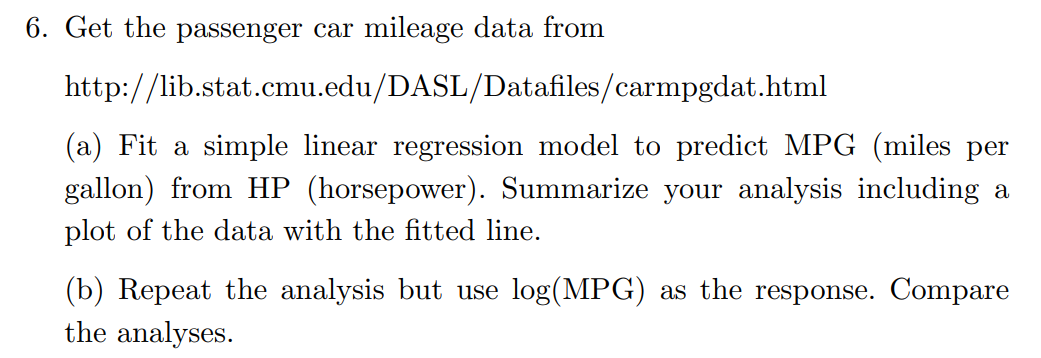

In [17]:
milagedata = pd.read_csv('carmileage.txt', sep='\t')
milagedata.head()

,MAKE,MODEL,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96.0,17.5,NaN
1,GM/GeoMetro,,92,55.0,56.0,97.0,20.0
2,GM/GeoMetroLSI,92,55,55.9,97.0,20.0,NaN
3,SuzukiSwift,,92,70.0,49.0,105.0,20.0
4,DaihatsuCharade,92,53,46.5,96.0,20.0,NaN


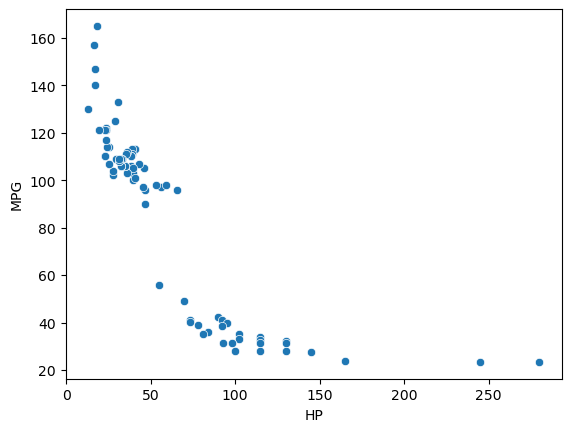

In [18]:
sns.scatterplot(x=milagedata['HP'], y=milagedata['MPG'])
plt.show()

In [19]:
def linear_regression(X, Y):
    if len(X.shape) == 1:
        X = X.reshape(len(X), 1)
    X = np.insert(X, 0, 1, axis = 1)
    n, k = X.shape
    assert(len(Y) == n)
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    Yhat = X @ beta
    training_error = np.sum((Y - Yhat)  ** 2)
    sigmahat = np.sqrt(np.sum((Y - Yhat)  ** 2) / (n - k))
    betavar = sigmahat ** 2 * np.linalg.inv(X.T @ X)

    return {'Yhat': Yhat,
            'beta': beta,
            'sigmahat': sigmahat,
            'betavar': betavar,
            'training error': training_error}


In [20]:
X = milagedata['HP'].to_numpy()
print(X.shape)
Y = milagedata['MPG'].to_numpy()
dict = linear_regression(X, Y)
Yhat = dict['Yhat']
beta = dict['beta']
sigmahat = dict['sigmahat']
betavar = dict['betavar']

(82,)


In [21]:
dict

{'Yhat': array([ 82.94144654,  89.96856551,  89.36044945,  79.83329777,
         95.7118839 ,  95.91458926,  96.45513687,  87.13069054,
         91.11722919,  97.8065059 ,  77.80624422,  99.4957172 ,
         99.4957172 ,  77.80624422, 100.37410707, 100.57681242,
         74.42782164, 100.91465468, 101.32006539,  66.31960744,
         64.96823841,  99.6308541 ,  62.94118486, 100.57681242,
        100.91465468, 101.18492849, 101.18492849,  64.96823841,
        107.19852068,  95.4416101 , 102.60386597, 102.73900287,
         70.37371454, 103.21198204,  58.21139324,  72.40076809,
        103.41468739, 103.48225584, 104.69848797,  58.21139324,
         39.29222678, 105.37417249, 105.37417249, 105.37417249,
        105.37417249,  64.29255389, 105.84715165, 105.9147201 ,
         60.91413131,  39.29222678,  49.42749453,  49.42749453,
         49.42749453, 105.98228855, 106.59040462, 107.60393139,
         39.29222678, 108.21204746,  49.42749453, 108.21204746,
         59.56276227,  29.156959

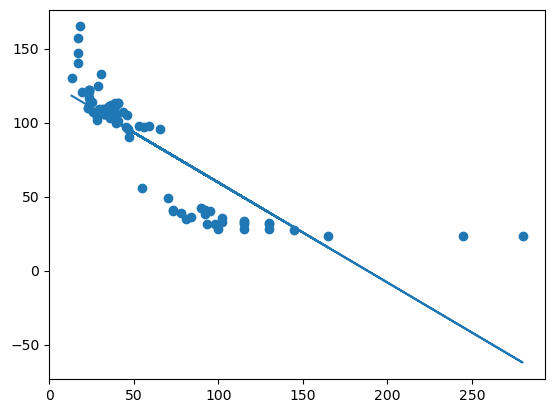

In [22]:
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [23]:
import statsmodels.api as sm

In [24]:
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     183.3
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           2.13e-22
Time:                        14:34:13   Log-Likelihood:                -367.17
No. Observations:                  82   AIC:                             738.3
Df Residuals:                      80   BIC:                             743.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.1312      3.816     33.311      0.000     119.536     134.726
x1            -0.6757      0.050    -13.541      0.000      -0.775      -0.576
==============================================================================
Omnibus:                       18.080   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.300
Skew:                           0.804   Prob(JB):                     5.87e-08
Kurtosis:                       5.676   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X = np.log(milagedata['HP'].to_numpy())
Y = np.log(milagedata['MPG'].to_numpy())
dict = linear_regression(X, Y)
Yhat = dict['Yhat']
beta = dict['beta']
sigmahat = dict['sigmahat']
betavar = dict['betavar']

(82,)
[ 7.49205017 -0.82316231]
0.2068134363650641
[[ 0.01815838 -0.00457857]
 [-0.00457857  0.00118861]]
0.13475303108685646 0.034476277385550785


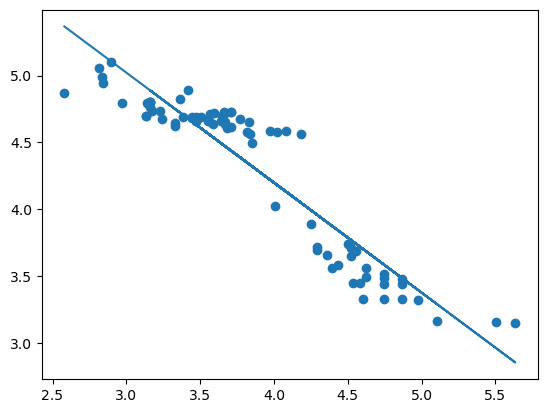

In [26]:
plt.scatter(X, Y)
print(X.shape)
print(beta)
plt.plot(X, Yhat)
print(sigmahat)
print(betavar)
print(np.sqrt(betavar[0, 0]), np.sqrt(betavar[1, 1]))

(10000,)
(10000, 2)
(2,) (10000, 2)
0.2068134363650641
[[ 0.01815838 -0.00457857]
 [-0.00457857  0.00118861]]
0.13475303108685646 0.034476277385550785


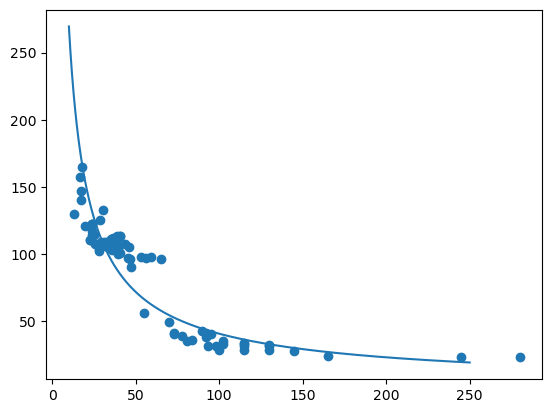

In [27]:
plt.scatter(np.exp(X), np.exp(Y))
logxfit = np.log(np.linspace(10, 250, 10000))
print(logxfit.shape)
logxfitandones = logxfit.reshape(len(logxfit), 1)
logxfitandones = np.insert(logxfitandones, 0, 1, axis = 1)
print(logxfitandones.shape)
print(beta.shape, logxfitandones.shape)
logyfit = beta @ logxfitandones.T
plt.plot(np.exp(logxfit), np.exp(logyfit))
print(sigmahat)
print(betavar)
print(np.sqrt(betavar[0, 0]), np.sqrt(betavar[1, 1]))

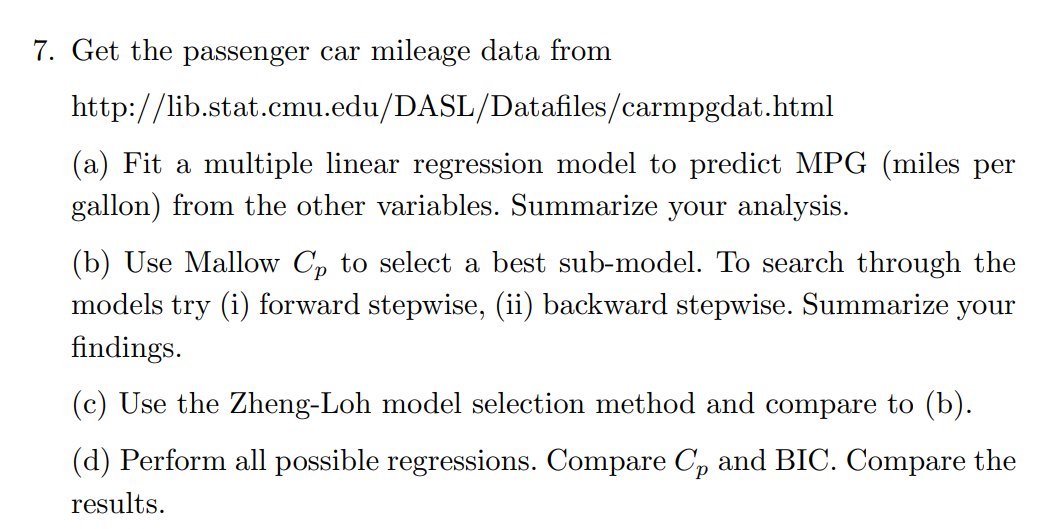

In [28]:
milagedata.dropna().loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].head()

,VOL,HP,SP,WT
1,92,55.0,97.0,20.0
3,92,70.0,105.0,20.0
10,89,73.0,103.0,22.5
13,89,73.0,103.0,22.5
16,91,78.0,106.0,22.5


In [29]:

Y = milagedata.dropna()['MPG'].to_numpy()
X = milagedata.dropna().loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].to_numpy()

In [30]:
dict = linear_regression(X, Y)
Yhat = dict['Yhat']
beta = dict['beta']
sigmahat = dict['sigmahat']
betavar = dict['betavar']

In [31]:
dict

{'Yhat': array([49.97196322, 45.82358607, 44.72169339, 44.72169339, 42.89995795,
        39.07498311, 38.60200869, 38.57432466, 38.60200869, 39.40058251,
        36.57533309, 34.12482575, 31.62358426, 35.08988979, 31.61084079,
        29.67518047, 29.67518047, 29.67518047, 28.23479855, 29.67518047,
        28.53500181, 28.04752848, 23.96869035, 23.97169756, 23.02428601]),
 'beta': array([ 1.95373484e+02,  2.12391080e-03,  4.32546931e-01, -1.32957264e+00,
        -2.02092281e+00]),
 'sigmahat': 2.9220191070268333,
 'betavar': array([[ 2.43344597e+03,  1.09869290e-01,  8.47989407e+00,
         -2.54216123e+01, -1.82678636e+01],
        [ 1.09869290e-01,  2.59265532e-03,  1.65682877e-03,
         -2.84178867e-03, -7.91737947e-03],
        [ 8.47989407e+00,  1.65682877e-03,  3.04754719e-02,
         -8.95090808e-02, -6.80101269e-02],
        [-2.54216123e+01, -2.84178867e-03, -8.95090808e-02,
          2.67819438e-01,  1.91635888e-01],
        [-1.82678636e+01, -7.91737947e-03, -6.80101269

In [32]:
print(beta)

[ 1.95373484e+02  2.12391080e-03  4.32546931e-01 -1.32957264e+00
 -2.02092281e+00]


In [33]:
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     38.83
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           3.68e-09
Time:                        14:34:14   Log-Likelihood:                -59.491
No. Observations:                  25   AIC:                             129.0
Df Residuals:                      20   BIC:                             135.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        195.3735     49.330      3.961      0.001      92.473     298.274
x1             0.0021      0.051      0.042      0.967      -0.104       0.108
x2             0.4325      0.175      2.478      0.022       0.068       0.797
x3            -1.3296      0.518     -2.569      0.018      -2.409      -0.250
x4            -2.0209      0.418     -4.837      0.000      -2.892      -1.149
==============================================================================
Omnibus:                        0.330   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.428
Skew:                           0.233   Prob(JB):                        0.807
Kurtosis:                       2.560   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
def mallowscore(df, ycol, xcols):
    df = df.dropna()
    Y = df[ycol].to_numpy()
    X = df.loc[:, df.columns.isin(xcols)].to_numpy()
    S = len(xcols)
    results = linear_regression(X, Y)
    training_error = results['training error']
    sigmahat = results['sigmahat']
    return training_error + 2 * S * sigmahat
    

In [35]:
from itertools import chain, combinations, permutations



Find best from all combinations:

In [36]:
mallowscores = []

for S in chain.from_iterable(combinations(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].columns, r) for r in range(5)):
    mallowscores.append([S, mallowscore(milagedata, 'MPG', list(S))])

mallow_scores = pd.DataFrame(mallowscores, columns=['S', 'Mallow Score'])

mallow_scores.describe()
print('best = ')
mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]

best = 


S               (HP, SP, WT)
Mallow Score      187.889105
Name: 14, dtype: object

In [37]:
mallow_scores

,S,Mallow Score
0,(),1497.077600
1,"(VOL,)",1453.115210
2,"(HP,)",667.993349
3,"(SP,)",886.907087
4,"(WT,)",235.607031
5,"(VOL, HP)",506.940647
6,"(VOL, SP)",662.534903
7,"(VOL, WT)",242.160659
8,"(HP, SP)",418.274109
9,"(HP, WT)",240.465199


Foward Stepwise:

(Gets stuck on only one covariate and doesn't find the optimal)

In [38]:
mallowscores = []
goodcols = []
currbest = np.inf
best = mallowscore(milagedata, 'MPG', [])
col = []
currbestS = []

print(best)
print(col)

while best < currbest:
    currbestS = col
    goodcols = goodcols + col
    currbest = best
    mallowscores = []
    for S in combinations(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'] + goodcols)].columns, 1):
        mallowscores.append([list(S) + goodcols, mallowscore(milagedata, 'MPG', goodcols + list(S))])
    mallow_scores = pd.DataFrame(mallowscores, columns=['S', 'Mallow Score'])
    print(mallow_scores)
    best = mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]['Mallow Score']
    print(best)
    col = mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]['S']
    print(col)
print('\n\n','results:\n\n','best = ', currbest)
print(currbestS)


1497.0776
[]
       S  Mallow Score
0  [VOL]   1453.115210
1   [HP]    667.993349
2   [SP]    886.907087
3   [WT]    235.607031
235.60703142019852
['WT']
           S  Mallow Score
0  [VOL, WT]    242.160659
1   [HP, WT]    240.465199
2   [SP, WT]    237.528132
237.52813238005007
['SP', 'WT']


 results:

 best =  235.60703142019852
['WT']


Backwards stepwise:

In [39]:
mallowscores = []
goodcols = list(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].columns)
currbest = np.inf
best = mallowscore(milagedata, 'MPG', goodcols)
col = list(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].columns)
currbestS = list(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].columns)

print(best)
print(col)

while best < currbest:
    currbestS = col
    goodcols = col
    currbest = best
    mallowscores = []
    remainingdata = milagedata[goodcols]
    for S in combinations(remainingdata.columns, len(remainingdata.columns) - 1):
        mallowscores.append([list(S), mallowscore(milagedata, 'MPG', list(S))])
    mallow_scores = pd.DataFrame(mallowscores, columns=['S', 'Mallow Score'])
    print(mallow_scores)
    best = mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]['Mallow Score']
    print(best)
    col = mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]['S']
    print(col)
print('\n\n','results:\n\n','best = ', currbest)
print(currbestS)

194.14006609281253
['VOL', 'HP', 'SP', 'WT']
               S  Mallow Score
0  [VOL, HP, SP]    395.745486
1  [VOL, HP, WT]    246.852908
2  [VOL, SP, WT]    242.742227
3   [HP, SP, WT]    187.889105
187.88910513460098
['HP', 'SP', 'WT']
          S  Mallow Score
0  [HP, SP]    418.274109
1  [HP, WT]    240.465199
2  [SP, WT]    237.528132
237.52813238005007
['SP', 'WT']


 results:

 best =  187.88910513460098
['HP', 'SP', 'WT']


Zheng Loh method:

In [40]:
results = sm.OLS()

In [41]:
x=list(map(list, permutations([1,2,3])))